In [61]:
%reload_ext autoreload
%autoreload 2

# 0.01: Reconstructed Images

We visualize the reconstructed images and t-error. First, we load the data, and output the sizes.

In [62]:
from quantile_diffusion_mia.config import DATASET_CONFIG

dataset = "CIFAR10"
config = DATASET_CONFIG[dataset]

In [63]:
import torch
from quantile_diffusion_mia.dataset import QuantileRegressionDataset

data_dir = "../" + config["quantile_regression_data_path"]
dataset = QuantileRegressionDataset.load(data_dir)

In [64]:
print("Original Images Shape:", dataset.original_images.shape)
print("Reconstructed Images Shape:", dataset.reconstructed_images.shape)
print("T-Errors Shape:", dataset.t_errors.shape)
print("Labels Shape:", dataset.labels.shape)

Original Images Shape: torch.Size([50000, 3, 32, 32])
Reconstructed Images Shape: torch.Size([50000, 3, 32, 32])
T-Errors Shape: torch.Size([50000])
Labels Shape: torch.Size([50000])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9607843..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.2467434..1.3000991].


The t_error is: 1.5479917e-10
The label is: 1


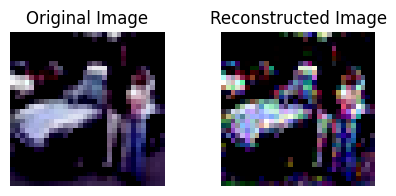

In [66]:
import numpy as np

import matplotlib.pyplot as plt

# Select a random index
random_index = np.random.randint(0, len(dataset.original_images))

# Get the images and t-error
original_image = dataset.original_images[random_index]
reconstructed_image = dataset.reconstructed_images[random_index]
t_error = dataset.t_errors[random_index].cpu().numpy()
label = dataset.labels[random_index].cpu().numpy()

# Plot the images and t-error
fig, axes = plt.subplots(1,2, figsize=(5, 2))

axes[0].imshow(original_image.permute(1, 2, 0).cpu())  # Assuming the image is in (C, H, W) format
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(reconstructed_image.permute(1, 2, 0).cpu())  # Assuming the image is in (C, H, W) format
axes[1].set_title('Reconstructed Image')
axes[1].axis('off')

print("The t_error is:", t_error)
print("The label is:", label)
plt.show()